In [3]:
from __future__ import division
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import plotly 
import plotly.plotly as py
from plotly.graph_objs import *

In [4]:
plotly.tools.set_credentials_file(username='yomna', api_key='pw2q6rLceVPz18VKC4XM')


###### Load Data

In [6]:
train_data = pd.read_csv("occupancy_data/datatraining.txt")
test_data = pd.read_csv("occupancy_data/datatest.txt")
test_data2 = pd.read_csv("occupancy_data/datatest2.txt")

data = pd.concat([train_data, test_data, test_data2])

print data.info()
print data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20560 entries, 1 to 9752
Data columns (total 7 columns):
date             20560 non-null object
Temperature      20560 non-null float64
Humidity         20560 non-null float64
Light            20560 non-null float64
CO2              20560 non-null float64
HumidityRatio    20560 non-null float64
Occupancy        20560 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ MB
None
                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  

###### Manibulating Data

In [149]:
#data
target = data['Occupancy']
tmp = data.drop(['date', 'Occupancy', 'HumidityRatio'], axis=1)

class_1 = [d for d, t in zip(tmp.values, target) if t == 1]
class_2 = [d for d, t in zip(tmp.values, target) if t == 0]

class_1 = pd.DataFrame.from_records(class_1)
class_2 = pd.DataFrame.from_records(class_2[:len(class_1)])

# class_1_means = np.mean(class_1, axis=0)
# class_2_means = np.mean(class_2, axis=0)

# class_1_std = np.std(class_1, axis=0)
# class_2_std = np.std(class_2, axis=0)

###### Temperature

In [153]:
Temprature_class1 = Scatter(
    x=range(len(class_1[0])),
    y=class_1[0],
    name='Occupaied',
    mode='lines'
)

Temprature_class2 = Scatter(
    x=range(len(class_2[0])),
    y=class_2[0],
    name='Not Occupaied',
    mode='lines'
)

figure = Data([Temprature_class1, Temprature_class2])

py.iplot(figure, filename='Temperature-basic-line')

###### Humidity

In [156]:
humidity_class1 = Scatter(
    x=range(len(class_1[1])),
    y=class_1[1],
    name='Occupaied',
    mode='lines'
)

humidity_class2 = Scatter(
    x=range(len(class_2[1])),
    y=class_2[1],
    name='Not Occupaied',
    mode='lines'
)

figure = Data([humidity_class1, humidity_class2])

# py.iplot(figure, filename='humidity-basic-line')

###### Light

In [152]:
light_class1 = Scatter(
    x=range(len(class_1[2])),
    y=class_1[2],
    name='Occupaied',
    mode='lines'
)

light_class2 = Scatter(
    x=range(len(class_2[2])),
    y=class_2[2],
    name='Not Occupaied',
    mode='lines'
)

figure = Data([light_class1, light_class2])

py.iplot(figure, filename='Light_basic_line')

###### Scatter matrix

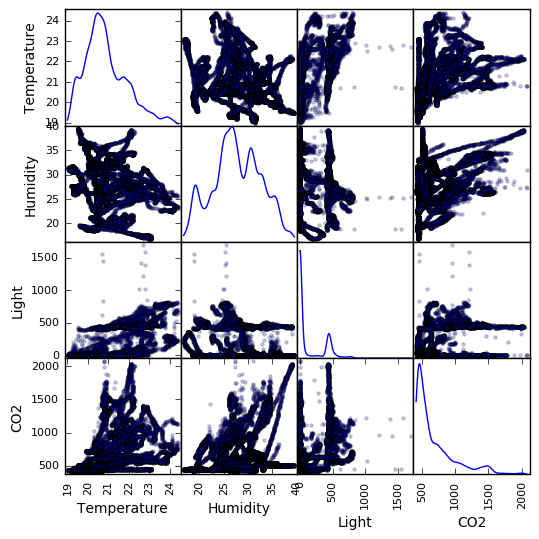

In [151]:
scatter_matrix(tmp, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()